### 생선 분류
- 데이터셋: fish.csv
- feature(특성)/입력 데이터: weight, Length
- 타겟/클래스/출력: Species
<br><br>
- 지도학습 / 분류
<br>
- 분류 알고리즘: KNN

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'koreanize_matplotlib'

#### [1] 데이터 확인
- 결측치, 중복값, 이상치 확인
- 데이터 분포 histogram 확인

In [2]:
DATA_FILE = '../data/fish.csv'

# 절대경로
DATA_FILE2 = r'C:\Users\KDP-43\Desktop\머신러닝_1\data\fish.csv'

##### csv -> DF
- 첫번째 라인: 헤더 유무
- 구분자: ',' 
- 로딩컬럼: Species, Weight, Length (0,1,2)

In [3]:
fishDF = pd.read_csv(DATA_FILE, usecols=[0,1,2])

In [4]:
fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


##### 컬럼별 결측치 체크
		--> 컬럼별 고유값(unique) & 개수(value_counts) 확인

In [5]:
fishDF.value_counts()

Species    Weight  Length
Roach      160.0   22.5      2
Perch      120.0   22.0      2
Bream      600.0   32.0      2
           700.0   33.0      2
           242.0   25.4      1
                            ..
Perch      100.0   18.0      1
           110.0   21.0      1
                   22.0      1
           115.0   21.0      1
Whitefish  1000.0  40.0      1
Name: count, Length: 155, dtype: int64

##### 컬럼별 중복값 체크
		--> 길이, 무게는 같아도 높이,너비,대각선 길이가 다를수도!!
		--> 중복 데이터 유지

##### 피쳐&타겟 간의 관계, 피쳐&피쳐 간의 관계
- 피쳐&타겟:	상관계수 확인

In [7]:
fishDF.corr(numeric_only=True)

,Weight,Length
Weight,1.000000,0.918618
Length,0.918618,1.000000


##### 품종 타입: object --> int 변환 컬럼 추가
- 상관계수 계산 목적
- one hot encoding

In [8]:
fishDF['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
species_transfer = dict(zip(fishDF['Species'].unique().tolist))

In [10]:
values = {'Bream':1, 'Roach':2, 'Whitefish':3, 'Parkki':4, 'Perch':5, 'Pike':6, 'Smelt':7}
fishDF['Code'] = fishDF['Species'].replace(values)


In [48]:
## dict Comprehension Ver.
names = fishDF['Species'].unique().tolist() # tolist() array -> list
										  # to_list() series -> list
{name:idx for idx,name in enumerate(names,1)}

{'Bream': 1,
 'Roach': 2,
 'Whitefish': 3,
 'Parkki': 4,
 'Perch': 5,
 'Pike': 6,
 'Smelt': 7}

In [44]:
val = fishDF['Species'].unique().tolist()
species_num = list(range(1,len(val)+1))
temp = fishDF['Species'].replace( dict(zip(val, species_num ) ) )
temp[:5]

0    1
1    1
2    1
3    1
4    1
Name: Species, dtype: int64

##### 7가지 종류에 대한 상관계수

In [11]:
fishDF.corr(numeric_only=True)

,Weight,Length,Code
Weight,1.000000,0.918618,-0.176783
Length,0.918618,1.000000,-0.118425
Code,-0.176783,-0.118425,1.000000


In [12]:
mask = (fishDF['Species'] == 'Bream') | (fishDF['Species'] == 'Smelt')
twofishDF = fishDF[mask]
twofishDF.corr(numeric_only=True)

,Weight,Length,Code
Weight,1.000000,0.960347,-0.843828
Length,0.960347,1.000000,-0.944132
Code,-0.843828,-0.944132,1.000000


#### [2] 시각화

In [37]:
twofishDF

,Species,Weight,Length,Code
0,Bream,242.0,25.4,1
1,Bream,290.0,26.3,1
2,Bream,340.0,26.5,1
3,Bream,363.0,29.0,1
4,Bream,430.0,29.0,1
5,Bream,450.0,29.7,1
6,Bream,500.0,29.7,1
7,Bream,390.0,30.0,1
8,Bream,450.0,30.0,1
9,Bream,500.0,30.7,1


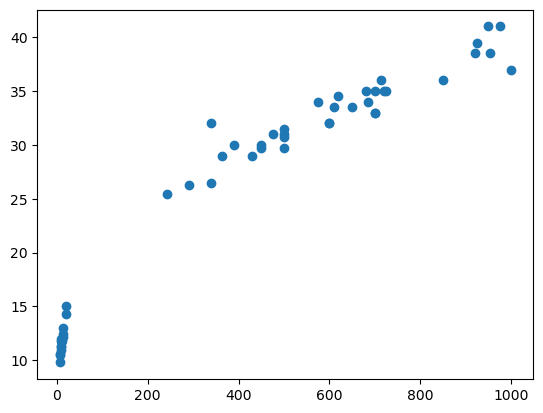

In [34]:
# 도미(Bream) 빙어(Smelt) 시각화

plt.scatter( twofishDF['Weight'], twofishDF['Length'])
plt.show()

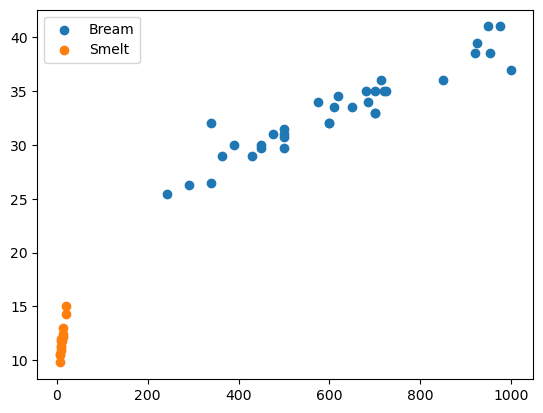

In [42]:
# 도미(Bream) 시각화
plt.scatter( twofishDF.loc[:35,'Weight'], twofishDF.loc[:35,'Length'], 
            label='Bream')
# 빙어(Smelt) 시각화
plt.scatter( twofishDF.loc[145:,'Weight'], twofishDF.loc[145:,'Length'],
            label='Smelt')
plt.legend()
plt.show()

2개 피쳐 (weight, Length)로 생선 분류가 가능함을 확인

#### [3] 학습/훈련 진행
- 지도학습: 분류
- ML Framework: Scikit-learn
- 학습 알고리즘: KNN (최근접이웃 알고리즘)

In [49]:
### 모듈 로딩
from sklearn.neighbors import KNeighborsClassifier

##### 3_1 학습 인스턴스 생성
- 사용법: 클래스명(매개변수 값)<br>
- 모델 파라미터:  모델 학습 후 정의되는 속성 값 <br>
				예시) XXX_ <br>
				ex) classes_, effective_metric_, n_features_in_

In [76]:
#  인스턴스 생성
model = KNeighborsClassifier()
print(model, model.n_neighbors)		# 기본값 : K=5
# error model.classes_

KNeighborsClassifier() 5


##### 3_2 학습/훈련 진행
- model.fit( 피쳐2D, 타겟1D )

In [53]:
features = twofishDF[ ['Weight', 'Length']]
target = twofishDF['Code']

print(f'features.shape: {features.shape}, {features.ndim}D')
print(f'target.shape: {target.shape}, {target.ndim}D')

features.shape: (49, 2), 2D
target.shape: (49,), 1D


In [54]:
model.fit(features, target)

KNeighborsClassifier()

In [58]:
### 모델 학습 후 모델 파라미터 확인
print( model.classes_, model.feature_names_in_)

[1 7] ['Weight' 'Length']


#### [4] 검증 (model.score)
- KNN의 경우, 모델 (규칙, 패턴) 생성 X
- 검증 데이터가 입력이 되면 학습 데이터와 거리(distance) 측정
- 임의로 지정한 K에 대해 검증 데이터와 가까운 K 개수 데이터 도출
- 분류, 

In [70]:
# 검증 데이터셋 / 타겟
# validation_data = twofishDF.loc[0, ['Weight','Length']]			# (2,)	-> 1D
validation_data = twofishDF.loc[[0], ['Weight','Length']]		# (1, 2)-> 2D
target = twofishDF.loc[0, 'Code']

print(validation_data.shape, validation_data.ndim, target.shape, target.ndim)

(1, 2) 2 () 0


In [69]:
# 검증 데이터셋으로 예측 결과(predict) & 타겟 비교
pre_target = model.predict(validation_data)
pre_target[0] == target

True

In [73]:
# 검증 데이터셋 / 타겟 multiple

validation_data = twofishDF.loc[:5, ['Weight','Length']]		# (6, 2)-> 2D
target = twofishDF.loc[:5, 'Code']

print(validation_data.shape, validation_data.ndim, target.shape, target.ndim)

# 검증 데이터셋으로 예측 결과(predict) & 타겟 비교
pre_target = model.predict(validation_data)
pre_target == target

(6, 2) 2 (6,) 1


0    True
1    True
2    True
3    True
4    True
5    True
Name: Code, dtype: bool

In [74]:
# model.score( 2D 피쳐, 1D 타겟)
#	- 결과: 0.0 ~ 1.0	/ getting higher getting better

In [75]:
model.score(validation_data, target)

1.0